# Default Setup

In [1]:


# Standard Stuff
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

from pyss3 import SS3
from pyss3.util import Dataset, Evaluation, span

import numpy as np
import pandas as pd


data_root = 'data'

## Load Data

In [31]:
df = pd.read_csv(data_root + "/SemEval2017-task4-dev.subtask-A.english.INPUT.txt", sep="\t", header=None)
df = df[[1,2]]

labels = df[1].to_list()
text = df[2].to_list()
X_train, X_val, y_train, y_val = train_test_split(text, labels, test_size=0.2)
pdlist = pd.Series(y_train)

labels_postive = pdlist.replace(['neutral', 'negative'], 'other').to_list()
labels_negative = pdlist.replace(['neutral', 'positive'], 'other').to_list()
labels_neutral = pdlist.replace(['positive', 'negative'], 'other').to_list()

## Work with Classifier

In [32]:
clf = SS3(l=1, p = 0)
clf1 = SS3(l=1,  p = 0)
clf2 = SS3(l=1,  p = 0)
clf3 = SS3(l=1,  p = 0)
clf.fit(X_train, y_train, n_grams=5)
clf1.fit(X_train, labels_postive, n_grams=5)
clf2.fit(X_train, labels_negative, n_grams=5)
clf3.fit(X_train, labels_neutral, n_grams=5)

Training on 'other': 100%|██████████| 2/2 [00:04<00:00,  2.26s/it]  


In [33]:
def classify(data, positive = clf1, negative = clf2, neutral = clf3):
  predict_positive =  positive.predict_proba(data)
  predict_negative =  negative.predict_proba(data)
  predict_neutral =  neutral.predict_proba(data)
  result = []
  positive_index = positive.get_category_index('positive')
  negative_index = negative.get_category_index('negative')
  neutral_index = neutral.get_category_index('neutral')
  
  for i in range(len(data)):
      result.append(max_class(predict_positive[i][positive_index], predict_negative[i][negative_index], predict_neutral[i][neutral_index]))
  return result

def max_class(a,b,c):
  if (a >= b) and (a >= c): 
      largest = 'positive' 
  elif (b >= a) and (b >= c): 
      largest = 'negative' 
  else: 
      largest = 'neutral' 
        
  return largest 



In [34]:
y_pred = classify(X_val)

# print(result[1:2])
# a = clf.predict(X_train, leave_pbar = True )

Classification: 100%|██████████| 4127/4127 [00:02<00:00, 1848.34it/s]


0.571041797033589


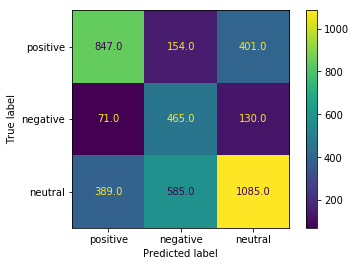

In [35]:
print(f1_score(y_val, y_pred, average='macro'))
ConfusionMatrixDisplay(confusion_matrix(y_val, y_pred, labels=['positive', 'negative', 'neutral']),display_labels=['positive', 'negative', 'neutral']).plot(values_format='.1f')

Classification: 100%|██████████| 4127/4127 [00:03<00:00, 1187.35it/s]



              precision    recall  f1-score   support

    negative       0.33      0.71      0.45       666
     neutral       0.66      0.42      0.51      2059
    positive       0.58      0.58      0.58      1402

    accuracy                           0.52      4127
   macro avg       0.52      0.57      0.52      4127
weighted avg       0.58      0.52      0.53      4127


 Accuracy: 0.520

[ updating evaluations cache ]


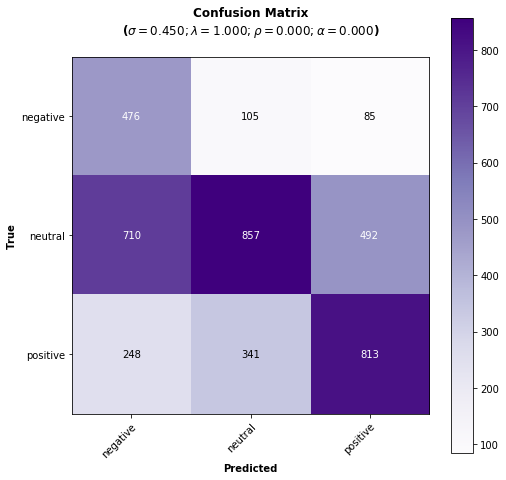

0.5151757142632577

In [36]:
Evaluation.test(clf, X_val, y_val, metric="f1-score")


Classification: 100%|██████████| 4127/4127 [00:02<00:00, 1705.95it/s]



              precision    recall  f1-score   support

       other       0.82      0.77      0.80      2725
    positive       0.61      0.68      0.64      1402

    accuracy                           0.74      4127
   macro avg       0.71      0.72      0.72      4127
weighted avg       0.75      0.74      0.74      4127


 Accuracy: 0.740

[ updating evaluations cache ]


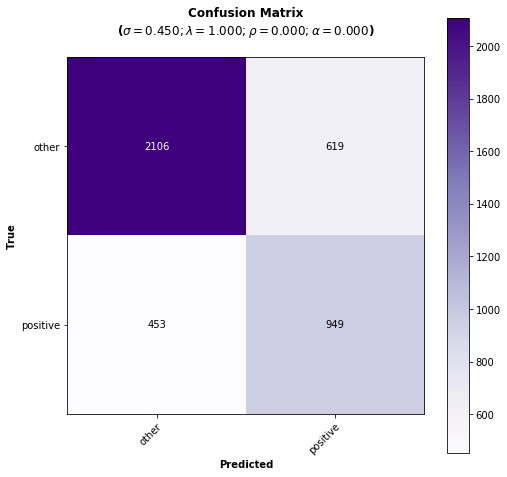

0.7180903152137066

In [39]:
Truelabel = pd.Series(y_val).replace(['neutral', 'negative'], 'other').to_list()
Evaluation.clear_cache(clf1)
Evaluation.test(clf1, X_val, Truelabel, metric="f1-score")

In [40]:
# n = 1
# print(X_val[n])
# print(clf.predict([X_val[n]]))
# print(clf.predict_proba([X_val[n]]))
# print('-----')
# print(clf1.predict([X_val[n]]))
# print(clf1.get_category_index('positive'))
# print(clf1.predict_proba([X_val[n]]))
# print('-----')
# print(clf2.predict([X_val[n]]))
# print(clf2.get_category_index('negative'))
# print(clf2.predict_proba([X_val[n]]))

# print('-----')
# print(clf3.predict([X_val[n]]))
# print(clf3.get_category_index('neutral'))
# print(clf3.predict_proba([X_val[n]]))


# print('TRUE LABEL')
# print(y_val[n])


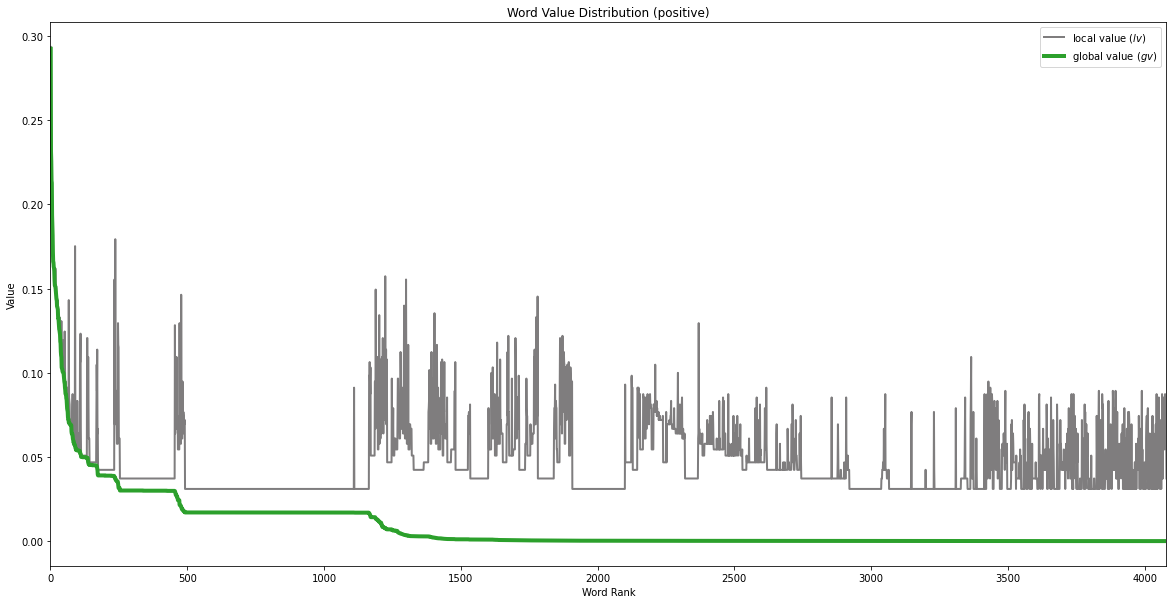

In [0]:
clf.plot_value_distribution('positive')

In [22]:
s_vals=0.45 
l_vals=1.0 
p_vals=0
a_vals=span(0, 1, 11)

In [23]:
best_s, best_l, best_p, best_a = Evaluation.grid_search(
    clf 
    ,X_val 
    ,y_val
    ,s=s_vals
    ,l=l_vals
    ,p=p_vals
    ,a=a_vals
    ,cache=False
    ,metric ="f1-score"
    ,n_grams = 5)

print('---------')

print(best_s, best_l, best_p, best_a)

Grid search: 100%|██████████| 11/11 [07:17<00:00, 39.78s/it]

---------
0.45 1.0 0.0 0.2
